
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: Jeremy M. Hein

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [2]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

**Response:**

In any hypothesis-test problem, there must be two competing hypotheses under consideration: the null hypothesis and the alternative hypothesis.  In Bob's test, he has only described a single hypothesis (null) but has not identified the alternative hypothesis.  If he wants to investigate if more than 20% of website visitors actually bought something, he should set to $H_1: p > 0.20$.  In addition, Bob's analysis is attempting to infer something about the population of website visitors (any statistical hypothesis test is a claim about the value of a parameter of a population characteristic).  Therefore, his null hypothesis should be $H_0: p = 0.20$, rather than $H_0: \hat{p} = 0.20$, since $\hat{p}$ is in reference to the sample proportion, not the population proportion.

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

**Response:**

We don’t want to accept a particular assertion unless data can be shown to strongly support it.  Therefore, in our case, we must set the alternative hypothesis to $H_1: p > 0.2$ and perform our analysis to see if there is sufficient evidience to reject the null and accept our alternative hypothesis.  This is consistent across all hypothesis testing - we must assume the null is true and provide sufficient evidence to accept an alternative hypothesis. 

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

**Response:**

Bob needs to compare the test-statistic he calculated ($Z_{test}$) to the threshold value ($Z_{critical}$), which is based on the significance level $\alpha$.  In his test above, he is comparing it to $\alpha$ itself, which is incorrect.  Also, his hypothesis-test is in the form $\theta > \theta_{0}$, which means he has a one-tailed rejection region and he should be checking if $Z_{test} > Z_{critical}$, not $Z_{test} < Z_{critical}$.  Lastly, Bob appears to be subtracting $\alpha$ from the population proportion, p, in his conclusion.  In no way does $\alpha$ alter the values of our hypotheses, which in this case should remain $H_0: p = 0.20$ and $H_1: p > 0.20$.

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

**Response:**

The p-value assesses the extremeness of our test statistic. The smaller the p-value, the more evidence we have against the Null Hypothesis.  It is NOT the probability the null hypothesis is true, thus Bob's conclusion is incorrect.

---


### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [7]:
#set sample size
n = 10
v = n - 1

#set means and standard deviations
xbarCoffee = 494.2
xbarNap = 492.8
xbarCandN = 451.3

coffeestdv = 39.6
napstdv = 45.2
coffeenapstdv = 31.9

#get t-critical value
t_alpha = stats.t.ppf(1-(0.05/2), df=v) #95% confidence interval

SEcoffee = coffeestdv/np.sqrt(n)
SEnap = napstdv/np.sqrt(n)
SEcoffeenap = coffeenapstdv/np.sqrt(n)

CIcoffeeMin = xbarCoffee - t_alpha*SEcoffee
CIcoffeeMax = xbarCoffee + t_alpha*SEcoffee

CInapMin = xbarNap - t_alpha*SEnap
CInapMax = xbarNap + t_alpha*SEnap

CIcoffeenapMin = xbarCandN - t_alpha*SEcoffeenap
CIcoffeenapMax = xbarCandN + t_alpha*SEcoffeenap

print("CI for coffee is: ", CIcoffeeMin, ", ", CIcoffeeMax)
print("CI for nap is: ", CInapMin, ", ", CInapMax)
print("CI for coffee + nap is: ", CIcoffeenapMin, ", ", CIcoffeenapMax)

CI for coffee is:  465.8718665242781 ,  522.5281334757218
CI for nap is:  460.46586785094377 ,  525.1341321490563
CI for coffee + nap is:  428.48011470011295 ,  474.1198852998871


In [4]:
n = 12
xbar = 3.65
mu = 3.5
s = 0.2

t_stat = (xbar - mu)/(s/np.sqrt(n))

#get t-critical value
t_alpha = stats.t.ppf(1-(0.05/2), df=n-1) #95% confidence interval
p_val = 1 - stats.t.cdf(t_stat, df = n-1)
print (p_val)

0.012389424734790766


**Response:**

We can see there is overlap in our CI's, so we can't conclue with certanity that the mean reaction time after drinking coffee, taking a nap, or drinking coffee and then taking a nap are better for faster reaction times.  We do see that the CI for a coffee-nap is lower than just drinking coffee or just taking a nap, so we may hypothesize that a coffee-nap is better for faster reaction times, but would need to perform more tests in order to reach that conclusion.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Hypothesis Setup:**

Let $\mu_{N}$ be the population mean reaction time for taking a nap and $\mu_{C}$ be the population mean reaction time for drinking coffee.

Then we have:

$H_{0}: \mu_{N} - \mu_{C} = 0$ (There is no difference in the mean reaction time)

$H_{1}: \mu_{N} - \mu_{C} < 0$ (The mean reaction time after taking a nap is faster (i.e. lower) than the mean reaction time after drinking coffee)

In addition, we have:

$\alpha = 0.05$, and

$t_{test} = \frac{\left(\bar{x}_{N} - \bar{x}_{C}\right) - c}{\sqrt{\frac{(\sigma_{N})^{2}}{n_{N}} + \frac{(\sigma_{C})^{2}}{n_{C}}}}$

In [74]:
#set variables
xbarNap = 492.8
xbarCoffee = 494.2

napstdv = 45.2
coffeestdv = 39.6

c = 0 #c = 0 in this case
n = 10 #both data sets have sample size 10
v = (n + n) - 2 #calculate degrees of freedom

#calculate t_test statistic
SEdiff = np.sqrt(((napstdv**2)/n) + ((coffeestdv**2)/n))
t_test = ((xbarNap - xbarCoffee) - c) / SEdiff

#calculate p_value using t-distribution
p_value = stats.t.cdf(t_test, df=v)

print (p_value)
if p_value < 0.05:
    print ("There is statistical evidence to reject the null hypothesis at the 95% confidence level and conclue that the mean reaction time after taking a nap is faster than the mean reaction time after drinking coffee.")
else:
    print ("There is not statistical evidence to reject the null hypothesis at the 95% confidence level, thus we conclue that the mean reaction time after taking a nap is not faster than the mean reaction time after drinking coffee.")

0.4710419665971047
There is not statistical evidence to reject the null hypothesis at the 95% confidence level, thus we conclue that the mean reaction time after taking a nap is not faster than the mean reaction time after drinking coffee.


**Results:**

We can see that our p-value of ~0.471 is greater than $\alpha$, therefore we fail to reject the null hypothesis and conclue that the mean reaction time after taking a nap is not greater than the mean reaction time after drinking coffee.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Hypothesis Setup:**

We will do this test in two parts - first comparing coffee-nap to coffee and then comparing coffee-nap to nap.  

Coffee-Nap v. Coffee:

$H_{0}: \mu_{CN} - \mu_{C} = 0$ (There is no difference in the mean reaction time)

$H_{1}: \mu_{CN} - \mu_{C} < 0$ (The mean reaction time after drinking coffee and then taking a nap is faster (i.e. lower) than the mean reaction time after just drinking coffee)

Coffee-Nap v. Nap:

$H_{0}: \mu_{CN} - \mu_{N} = 0$ (There is no difference in the mean reaction time)

$H_{1}: \mu_{CN} - \mu_{N} < 0$ (The mean reaction time after drinking coffee and then taking a nap is faster (i.e. lower) than the mean reaction time after just taking a nap)

As in part B, we have $\alpha = 0.05$ and 

$t_{test} = \frac{\left(\bar{x}_{CN} - \bar{x}_{C}\right) - c}{\sqrt{\frac{(\sigma_{CN})^{2}}{n_{CN}} + \frac{(\sigma_{C})^{2}}{n_{C}}}}$

$t_{test} = \frac{\left(\bar{x}_{CN} - \bar{x}_{N}\right) - c}{\sqrt{\frac{(\sigma_{CN})^{2}}{n_{CN}} + \frac{(\sigma_{N})^{2}}{n_{N}}}}$

In [72]:
#TESTING Coffee-Nap V. Coffee

#set variables
xbarCoffeeNap = 451.3
xbarCoffee = 494.2

coffeenapstdv = 31.9
coffeestdv = 39.6

c = 0 #c = 0 in this case
n = 10 #both data sets have sample size 10
v = (n + n) - 2 #calculate degrees of freedom

#calculate t_test statistic
SEdiff = np.sqrt(((coffeenapstdv**2)/n) + ((coffeestdv**2)/n))
t_test = ((xbarCoffeeNap - xbarCoffee) - c) / SEdiff

#calculate p_value using t-distribution
p_value = stats.t.cdf(t_test, df=v)

print (p_value)
if p_value < 0.05:
    print ("There is statistical evidence to reject the null hypothesis at the 95% confidence level and conclue that the mean reaction time after taking a coffee-nap is faster than the mean reaction time after drinking coffee.")
else:
    print ("There is not statistical evidence to reject the null hypothesis at the 95% confidence level, thus we conclue that the mean reaction time after taking a coffee-nap is not faster than the mean reaction time after drinking coffee.")

0.007842570445960756
There is statistical evidence to reject the null hypothesis at the 95% confidence level and conclue that the mean reaction time after taking a coffee-nap is faster than the mean reaction time after drinking coffee.


In [73]:
#TESTING Coffee-Nap V. Nap

#set variables
xbarCoffeeNap = 451.3
xbarNap = 492.8

coffeenapstdv = 31.9
napstdv = 45.2

c = 0 #c = 0 in this case
n = 10 #both data sets have sample size 10
v = (n + n) - 2 #calculate degrees of freedom

#calculate t_test statistic
SEdiff = np.sqrt(((coffeenapstdv**2)/n) + ((napstdv**2)/n))
t_test = ((xbarCoffeeNap - xbarNap) - c) / SEdiff

#calculate p_value using t-distribution
p_value = stats.t.cdf(t_test, df=v)

print (p_value)
if p_value < 0.05:
    print ("There is statistical evidence to reject the null hypothesis at the 95% confidence level and conclue that the mean reaction time after taking a coffee-nap is faster than the mean reaction time after taking a nap.")
else:
    print ("There is not statistical evidence to reject the null hypothesis at the 95% confidence level, thus we conclue that the mean reaction time after taking a coffee-nap is not faster than the mean reaction time after taking a nap.")

0.014518749480756805
There is statistical evidence to reject the null hypothesis at the 95% confidence level and conclue that the mean reaction time after taking a coffee-nap is faster than the mean reaction time after taking a nap.


**Response:**

In both tests, we see that our p-value is less than our confidence interval of 0.05 indicating there is statistical evidence to reject the null hypothesis and conclude that taking a coffee-nap is better for faster reaction times than just taking a nap or just drinking coffee.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

**Response:**

Since our data is normally distributed and the standard deviation is known, we can use the chi-squared distribtuion to calculate our CI.  Our resulting confidence interval is [21.94, 58.24].

In [75]:
#set variables
n = 10
v = n - 1
sigma = 31.9
sigma_square = sigma**2

#get critical values
x2_lower = stats.chi2.ppf(0.975,df=v)
x2_upper = stats.chi2.ppf(0.025,df=v)

#CI for variance
CIminVar = (v * sigma_square)/x2_lower
CImaxVar = (v * sigma_square)/x2_upper

#CI for standard deviation
CIminStdv = np.sqrt(CIminVar)
CImaxStdv = np.sqrt(CImaxVar)

print("CI for the standard deviation is: ", CIminStdv, ", ", CImaxStdv)

CI for the standard deviation is:  21.94194309529309 ,  58.236964822374404


<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [2]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

C:\Users\jerem\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Historical Interest in Influenza')

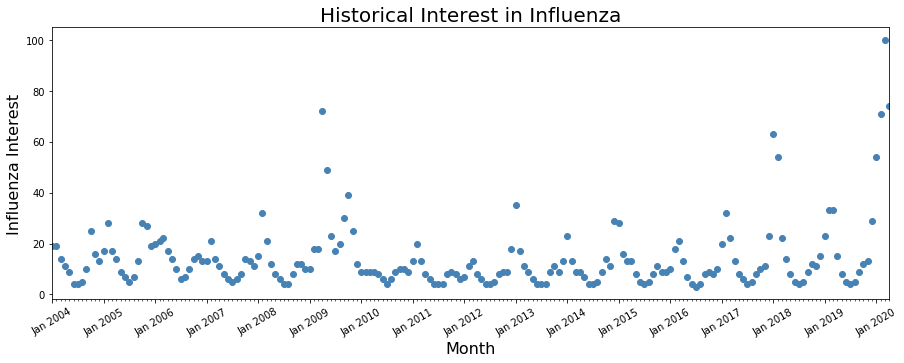

In [3]:
#load file into pandas dataframe
file_path = "C:/Users/jerem/OneDrive/Documents/CSCI3022/influenza_interest.csv"
df = pd.read_csv(file_path)

#rename columns
df.columns =['Date', 'Interest']

#add year and month columns to data
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

#convert date column to datetime64 data type
df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m")

#set up plot
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df["Date"], df["Interest"], color="steelblue")

#get minimum and maximum dates
dateMin = np.datetime64(min(df['Date']))
dateMax = np.datetime64(max(df['Date']))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('Jan %Y') #set format of of major ticks

#format ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
plt.xticks(rotation=30)

#set axis limits
ax.set_xlim(dateMin, dateMax)

#label appropriately
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Influenza Interest", fontsize=16);
ax.set_title("Historical Interest in Influenza", fontsize=20)

**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

Text(0.5, 1.0, 'Historical Interest in Influenza')

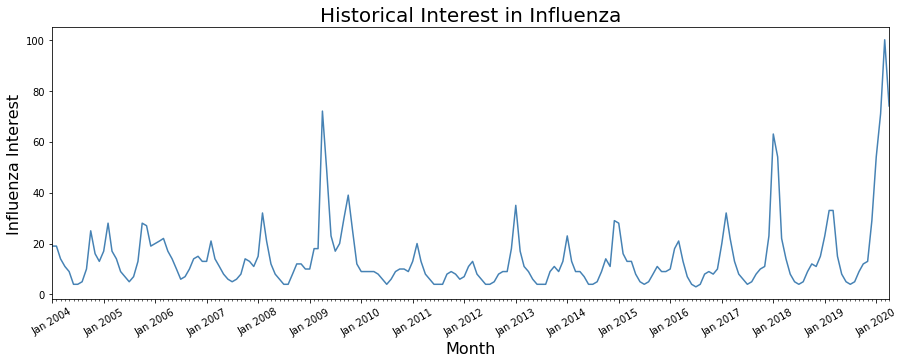

In [4]:
#set up plot
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Date"], df["Interest"], color="steelblue") #plot line rather than scatter

#get minimum and maximum dates
dateMin = np.datetime64(min(df['Date']))
dateMax = np.datetime64(max(df['Date']))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('Jan %Y') #set format of of major ticks

# format ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
plt.xticks(rotation=30)

#set axis limits
ax.set_xlim(dateMin, dateMax)

#label appropriately
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Influenza Interest", fontsize=16);
ax.set_title("Historical Interest in Influenza", fontsize=20)

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

In [5]:
#calculate means of each month
dfJan = df.loc[df["Month"]==1]
dfFeb = df.loc[df["Month"]==2]
dfMar = df.loc[df["Month"]==3]
dfApr = df.loc[df["Month"]==4]
dfMay = df.loc[df["Month"]==5]
dfJun = df.loc[df["Month"]==6]
dfJul = df.loc[df["Month"]==7]
dfAug = df.loc[df["Month"]==8]
dfSep = df.loc[df["Month"]==9]
dfOct = df.loc[df["Month"]==10]
dfNov = df.loc[df["Month"]==11]
dfDec = df.loc[df["Month"]==12]

Jan = dfJan['Interest'].mean()
Feb = dfFeb['Interest'].mean()
Mar = dfMar['Interest'].mean()
Apr = dfApr['Interest'].mean()
May = dfMay['Interest'].mean()
Jun = dfJun['Interest'].mean()
Jul = dfJul['Interest'].mean()
Aug = dfAug['Interest'].mean()
Sep = dfSep['Interest'].mean()
Oct = dfOct['Interest'].mean()
Nov = dfNov['Interest'].mean()
Dec = dfDec['Interest'].mean()

print(Jan)
print(Feb)
print(Mar)
print(Apr)
print(May)
print(Jun)
print(Jul)
print(Aug)
print(Sep)
print(Oct)
print(Nov)
print(Dec)

22.294117647058822
25.470588235294116
21.88235294117647
18.941176470588236
10.5625
6.4375
5.0
6.0625
10.25
14.9375
12.9375
14.9375


**Response:**

We can see from our line plot and from our calculation of monthly average interest that the data suggests there is seasonality in the interest in influzena.  We can see that interest in influenze increases in the fall and early winter months (Aug - Feb) and begins to decrease through the spring and summer months (Mar - July).  This makes sense, as more people are sick with the flu in the fall and winter months as opposed to the spring and summer months.

| Month      | Average Interest |
|:-----------|------------:|
| January    | 22.29       |
| February   | 25.47       |
| March      | 21.88       |
| April      | 18.94       |
| May        | 10.56       |
| June       | 6.44        |
| July       | 5.00        |
| August     | 6.06        |
| September  | 10.25       |
| October    | 14.94       |
| November   | 12.94       |
| December   | 14.94       |

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [6]:
def convert_annual(df):
    dfNew = df.groupby("Year").mean() #group by year and get mean
    dfNew = dfNew.drop(columns = ['Month']) #drop the months column
    dfNew.reset_index(inplace = True) #reset index
    return dfNew #return the new dataframe

dfAnnual = convert_annual(df) #call func
dfAnnual #print the annual datafram

,Year,Interest
0,2004,12.416667
1,2005,15.916667
2,2006,14.083333
3,2007,10.833333
4,2008,12.000000
5,2009,27.750000
6,2010,8.166667
7,2011,8.583333
8,2012,8.500000
9,2013,11.000000


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [7]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

Y = -2377.91584967328 + 1.1901552287582078 x


C:\Users\jerem\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


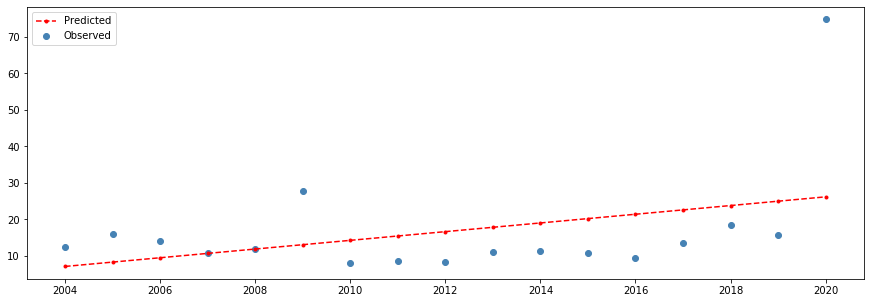

In [8]:
def linear_regress(df):
    Y = df['Interest']
    X = df['Year']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

model = linear_regress(dfAnnual)
ahat = model.params[0]
bhat = model.params[1]
print("Y =", ahat, "+", bhat,"x")

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(dfAnnual["Year"], dfAnnual["Interest"], color="steelblue", label="Observed")
ax.plot(dfAnnual["Year"], model.fittedvalues, 'r--.', label="Predicted")

# Add legend
ax.legend(loc = 'upper left')

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

**Response:**

$\hat{\beta}$ is the estimated slope of our linear model, and it measures the estimated increase or decrease in our response (interest) from a unit increase in our feature (time).  In our case, $\hat{\beta}$ is positive so we would expect that as time increases, so would the interest in influenza.

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [9]:
new_X=[1900,2050,2150]
new_X = sm.add_constant(new_X)
model.predict(new_X)

array([-116.62091503,   61.90236928,  180.91789216])

**Response:**

There are a lot of drawbacks with this model to predict interest in influenza.  We'll start with the data itself.  We can see from parts D and E that there were spikes in the annaul average interest in influenza during 2009 and 2020, which is likely due to global influenza pandemics during those time periods (swine flu in 2009 and COVID-19 in 2020).  The rest of the data points are relatively stable, so it appears our data and our regression model is skewed upwards making our predicition values less-reliable.  

Additionally, Google's "interest" variable is calculated in relation to the highest interest level over the given time period.  If we were to extend our graph into the future and we observed interest levels higer than our current highs, our response values would necessairly change as well, making prediciton more challenging and less reliable.  

Looking back to 1900, there are other socioeconoic factors our model is unlikely to capture.  For example, the Spanish Flu was in 1919 and we would expect to see a similar spike in interest during that year.  There have been numerous technological advances in healtcare, likely impacting awareness and treatment surrounding influenza (i.e. the seasonal flu vaccination wasn't developed until 1930 and wasn't widely available until 1945).

These are just a few examples that outline the limitations of our model.  All of these things together make our model and its predicted values of limited use.

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

In [10]:
def confidence_interval(df, model):
    #get ahat and bhat from model
    ahat = model.params[0]
    bhat = model.params[1]
    n = df.shape[0]
    v = n - 1
    xbar = df['Year'].mean()
    
    #add SSE for each row to the datafram
    df['SSE'] = (df['Interest'] - (ahat + bhat*df["Year"]))**2
    df['xbar'] = (df['Year'] - xbar)**2
    
    #SSE is the sum of all squares
    SSE = df['SSE'].sum()
    print(SSE)
    print(model.ssr)
    xbardiff = df['xbar'].sum()
    sigma_hat = np.sqrt(SSE / (n - 2))
    t_alpha = stats.t.ppf(1-(0.10/2), df=v) #90% confidence interval
    
    CImin = bhat - t_alpha * (sigma_hat/np.sqrt(xbardiff))
    CImax = bhat + t_alpha * (sigma_hat/np.sqrt(xbardiff))
    
    print("CI is: ", CImin, ", ", CImax)
    print("Beta-hat is: ", bhat)
    
confidence_interval(dfAnnual,model)

3363.064933959688
3363.0649339596944
CI is:  -0.10406212757949462 ,  2.48437258509591
Beta-hat is:  1.1901552287582078


In [6]:
t_alpha = stats.f.ppf((1-0.05), dfn=2, dfd=7) #90% confidence interval
print (t_alpha)

4.73741412777588


**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Interest   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.578
Date:                Sat, 18 Apr 2020   Prob (F-statistic):              0.129
Time:                        09:51:54   Log-Likelihood:                -69.065
No. Observations:                  17   AIC:                             142.1
Df Residuals:                      15   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2377.9158   1491.493     -1.594      0.132   -5556.958     801.126
Year           1.1902      0.741      1.606      0.129      -0.390       2.770
==============================================================================
Omnibus:                       26.281   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.465
Skew:                           2.371   Prob(JB):                     7.32e-09
Kurtosis:                       8.514   Cond. No.                     8.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Response:**

The coefficient of determination, $R^{2}$, quantifies how well the model explains the data.  Our model has an $R^{2}$ value of 0.147, suggesting that 14.7% of total variation in the data is explained by the model.

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

In [67]:
dfClean = df[df.Interest < np.percentile(df['Interest'], 97)]
dfClean.reset_index(inplace = True) #reset index
dfClean

,index,Date,Interest,Year,Month
0,0,2004-01-01,19,2004,1
1,1,2004-02-01,19,2004,2
2,2,2004-03-01,14,2004,3
3,3,2004-04-01,11,2004,4
4,4,2004-05-01,9,2004,5
...,...,...,...,...,...
184,187,2019-08-01,5,2019,8
185,188,2019-09-01,9,2019,9
186,189,2019-10-01,12,2019,10
187,190,2019-11-01,13,2019,11


**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

In [68]:
#convert clean data to annual
dfAnnualClean = convert_annual(dfClean)

#recalculate regression model
modelClean = linear_regress(dfAnnualClean)

#call CI on new clean data
confidence_interval(dfAnnualClean,modelClean)

CI is:  -0.5203847593829121 ,  0.22635623888377954
Beta-hat is:  -0.14701426024956626


**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?

**Response:**

With our CI including zero, this tells us that the average annual interest in influenza may not be increasing or decreasing over time.  This suggests that the interest in influenza is more affected by yearly trends and golbal outbreaks such as the Swine Flu or COVID-19.